# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

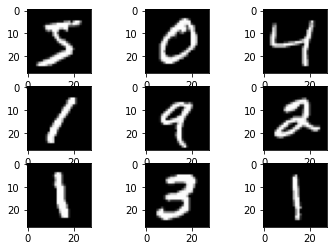

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np 

# Load the MNIST data set and divide it to train and test
# Extract the labels and the data for train and for test part

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()



### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
 
 ![picture](https://drive.google.com/uc?export=view&id=16AlGA5NCT3johoxJvCFEBCpB9w8LiawF)

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


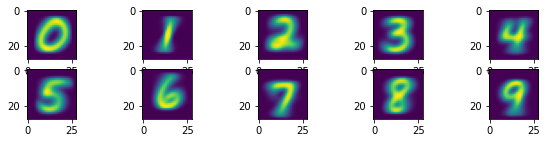

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


#Q1

# Reshape x_train, x_test
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# Define Bernouli model
clf = BernoulliNB(binarize=0)
clf.fit(x_train, y_train) #Fit the model
feature_log_probs = clf.feature_log_prob_
feature_log_probs_exp = np.exp(feature_log_probs) #convert the log probabilities to regular probabilities (which are between 0 to 1)

# Generate one sample for each class 
pyplot.figure(figsize=(10,2))  
for i in range(len(feature_log_probs_exp)):
  mclass_reshaped = np.reshape(feature_log_probs_exp[i],(28,28)) #reshape back
  pyplot.subplot(2,5,i+1)
  pyplot.imshow(mclass_reshaped)
pyplot.show()
 
 

In [ ]:
#Q2
from sklearn.metrics import accuracy_score
# Plot the confusion matrix of the classifier

y_pred = clf.predict(x_test) #the predicted classes (classified by the model)
conf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix: \n", conf_mat)
print('\n Result of accuracy score:', accuracy_score(y_test,y_pred))

The confusion matrix: 
 [[ 887    0    4    7    2   41   16    1   22    0]
 [   0 1085   10    5    0    9    6    0   19    1]
 [  19    8  852   29   17    4   32   14   55    2]
 [   5   15   34  844    0   13    9   15   49   26]
 [   2    6    4    0  795    4   21    1   23  126]
 [  23   12    7  129   30  627   16    8   21   19]
 [  18   18   15    2   13   35  851    0    6    0]
 [   1   24   14    4   15    0    0  871   27   72]
 [  16   23   13   76   17   22    7    6  758   36]
 [   9   13    5    9   74    8    0   24   24  843]]

 Result of accuracy score: 0.8413


#### Answer 2

2.
** Summarize of the confusion matrix:**

The values on the diagonal of the matrix represent the true classified classes - for each class it represent the amount of samples which were classified to the true label of the class, for example - 1085 samples were classified correctly to class 1, and their label was truely class 1.
We can see that the values on the diagonal are pretty high, this insight indicates a good perfoemance of the model.
As explained in the documentation of the confusion matrix function, the rows represent the true label of the classes and the columns represent the model classifcations. For example, We can see that 76 samples were classified to class 3 even though their true label is class 8, and also that 49 samples were classified to class 8 and their true label is class 3. This insight makes sense since 8 and 3 can be written in a pretty similar way.

In addition to that, we can see that the accuracy score of our model is 0.8413. this value is pretty high and it indicates of good performances of the model.


3.
In order to find the optimal treshold for the binarization we would iterate over different tresholds and run the model on different training groups, then take a look at the results and choose the treshold that gave the best results.



## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups `posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
import numpy as np
import math

# Implementation of NaiveBayes methods: fit, predict and predict_proba

class NaiveBayes(BaseEstimator, ClassifierMixin):
  '''
  BaseEstimator and ClassifierMixin are imported from sklearn.base
  '''
  likelihoods = 0
  priors = 0
  
  def fit(self, x, y):
    # Calculating the priors
    x = x.toarray()
    self.priors = [0 for i in range(20)]
    n = len(y) #amount of labels (documents)
    for label in y:
      self.priors[label] += 1
    for c in self.priors:
      c = c/n
    # calculating p(w|cj)
    documents_amount = x.shape[0]
    features_amount = x.shape[1]
    self.likelihoods = [[0 for i in range(20)] for j in range(features_amount)]
    classes_count = [0 for i in range(20)] #counts the total amount of words in documents for each class 
    for doc in range(documents_amount): #iterating through each document  
      label = y[doc]
      for word in range(features_amount):
        if x[doc][word]>0: 
          self.likelihoods[word][label] += x[doc][word]
          classes_count[label] += x[doc][word]
    for r in range(len(self.likelihoods)):
      for c in range(len(self.likelihoods[r])):
        self.likelihoods[r][c] = (self.likelihoods[r][c] + 0.001) / (classes_count[c] + features_amount + 1)


  def predict_log_proba(self, x):
    x = x.toarray()
    docs = [] #each entry in the list represents a document and each document has 20 cells contain the log probability for each label 
    for doc in x:
      doc_classes = [math.log(self.priors[i]) for i in range(20)] 
      for w in range(len(doc)):
        if doc[w] > 0:
          for i in range(20):
            if (self.likelihoods[w][i]) >0:
              doc_classes[i] += doc[w]*math.log(self.likelihoods[w][i])
      docs.append(doc_classes)
    return docs

      
  def predict(self, x):
    docs = self.predict_log_proba(x)
    return [np.argmax(doc) for doc in docs]
    

 

In [ ]:
# Load 'fetch_20newsgroups' data set

from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline

newsgroups_train = fetch_20newsgroups(subset = "train", remove = ('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset = "test", remove = ('headers', 'footers', 'quotes'))

x_train = newsgroups_train.data
y_train = newsgroups_train.target
x_test = newsgroups_test.data
y_test = newsgroups_test.target



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of words - Define CountVectorizer

cnt_vec = CountVectorizer(stop_words= "english", max_features = 1000)


In [ ]:
from sklearn.pipeline import make_pipeline

# Chain the vectorizer and the model by using Pipeline

pipeline = make_pipeline(cnt_vec, NaiveBayes())


In [ ]:
# Activate the model and predict it over the test data

pipeline.fit(x_train, y_train)

y_predicted = pipeline.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Compare the accuracy over the test data 

print("Classification report: \n \n" , classification_report(list(y_test), y_predicted))
print("Accuracy score:" , accuracy_score(list(y_test), y_predicted))

Classification report: 
 
               precision    recall  f1-score   support

           0       0.29      0.38      0.33       319
           1       0.44      0.57      0.50       389
           2       0.50      0.00      0.01       394
           3       0.41      0.48      0.44       392
           4       0.43      0.47      0.45       385
           5       0.59      0.58      0.58       395
           6       0.75      0.69      0.72       390
           7       0.48      0.52      0.50       396
           8       0.46      0.51      0.48       398
           9       0.50      0.52      0.51       397
          10       0.35      0.46      0.39       399
          11       0.70      0.58      0.64       396
          12       0.38      0.39      0.38       393
          13       0.44      0.47      0.45       396
          14       0.64      0.51      0.56       394
          15       0.46      0.61      0.53       398
          16       0.43      0.45      0.44       364


We can see that the accuracy score is about 0.465.
The accuracy score is a a computation of the number of correct predictions out of the total number of predictions, so it means that almost 50% of the predictions of our model were classified to their true label.

In [ ]:
# Compare our model to sklearn.naive_bayes.MultinomialNB

from sklearn.naive_bayes import MultinomialNB

multiNB_pipeline = make_pipeline(cnt_vec, MultinomialNB())
multiNB_pipeline.fit(x_train, y_train)
multiNB_y_predicted = multiNB_pipeline.predict(x_test)


print("Classification report for the built-in Multinomial NB: \n:" , classification_report(list(y_test), list(multiNB_y_predicted)))




Classification report for the built-in Multinomial NB: 
:               precision    recall  f1-score   support

           0       0.29      0.42      0.34       319
           1       0.44      0.57      0.50       389
           2       0.00      0.00      0.00       394
           3       0.40      0.47      0.43       392
           4       0.43      0.50      0.46       385
           5       0.60      0.56      0.58       395
           6       0.75      0.70      0.73       390
           7       0.48      0.56      0.52       396
           8       0.41      0.53      0.46       398
           9       0.48      0.58      0.53       397
          10       0.31      0.37      0.34       399
          11       0.74      0.55      0.63       396
          12       0.38      0.40      0.39       393
          13       0.46      0.46      0.46       396
          14       0.69      0.47      0.56       394
          15       0.49      0.58      0.53       398
          16       0.45

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Our model accuracy score:", accuracy_score(list(y_test), y_predicted))
print("Built-in MultinomialNB model accuracy score:", accuracy_score(list(y_test), multiNB_y_predicted))

Our model accuracy score: 0.46587891662241104
Built-in MultinomialNB model accuracy score: 0.4638874137015401


We can see that our model accuracy score is very similar to the built-in sklearn model for MultinomialNB and even a bit higher (the difference between out accuracy to their accuracy is about 0.001983), which means that our model achieved good perfomances similar to the built-in model perfomances. 

CountVectorizer allows us to use the occurrence of words (bag of words) but it has a disadvantage with long documents.
longer documents might have higher average count values than shorter documents even if they talk about same topics. 
So in order to check that we will try to use the tf-idf Vectorizer for downscaling the occurances of words in the document.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


# Compare between CountVectorizer to tfidfVectorizer

Countvec_pipeline = make_pipeline(cnt_vec, MultinomialNB())
multiNB_pipeline.fit(x_train, y_train)
multiNB_y_predicted = multiNB_pipeline.predict(x_test)

#CountVectroizer


print("CountVectorizer Preprocessing:")
print(classification_report(list(y_test), multiNB_y_predicted))


#TfidfVectorizer 


tfIdfVec =  TfidfVectorizer(stop_words= "english", max_features = 1000)
tfIdfVec_pipeline = make_pipeline(tfIdfVec, MultinomialNB())
tfIdfVec_pipeline.fit(x_train, y_train)
tfIdfVec_y_predicted = tfIdfVec_pipeline.predict(x_test)


print("\ntfidfVectorizer Preprocessing:")
print(classification_report(list(y_test), tfIdfVec_y_predicted))





CountVectorizer Preprocessing:
              precision    recall  f1-score   support

           0       0.29      0.42      0.34       319
           1       0.44      0.57      0.50       389
           2       0.00      0.00      0.00       394
           3       0.40      0.47      0.43       392
           4       0.43      0.50      0.46       385
           5       0.60      0.56      0.58       395
           6       0.75      0.70      0.73       390
           7       0.48      0.56      0.52       396
           8       0.41      0.53      0.46       398
           9       0.48      0.58      0.53       397
          10       0.31      0.37      0.34       399
          11       0.74      0.55      0.63       396
          12       0.38      0.40      0.39       393
          13       0.46      0.46      0.46       396
          14       0.69      0.47      0.56       394
          15       0.49      0.58      0.53       398
          16       0.45      0.44      0.44       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



tfidfVectorizer Preprocessing:
              precision    recall  f1-score   support

           0       0.34      0.33      0.33       319
           1       0.51      0.57      0.54       389
           2       0.53      0.55      0.54       394
           3       0.46      0.46      0.46       392
           4       0.56      0.49      0.52       385
           5       0.62      0.62      0.62       395
           6       0.69      0.75      0.72       390
           7       0.59      0.55      0.57       396
           8       0.55      0.50      0.53       398
           9       0.53      0.53      0.53       397
          10       0.40      0.68      0.50       399
          11       0.73      0.58      0.65       396
          12       0.45      0.36      0.40       393
          13       0.48      0.58      0.52       396
          14       0.66      0.54      0.59       394
          15       0.45      0.76      0.56       398
          16       0.45      0.52      0.48      

In [ ]:
# Compare the accuracy score between tfIDFVectorizer to CountVectorizer (in the built-in model)

print("Built-in model accuracy with countVectorizer preprocessing:", accuracy_score(list(y_test), multiNB_y_predicted))
print("Built-in model accuracy with tfIidfVectorizer preprocessing:",accuracy_score(list(y_test), tfIdfVec_y_predicted))



Built-in model accuracy with countVectorizer preprocessing: 0.4638874137015401
Built-in model accuracy with tfIidfVectorizer preprocessing: 0.5262878385554965


We can see that the accuracy for the built-in model with the tfidfVectorizer preprocessing is higher than the accuracy for the countVectorizer, this insight makes sense as we explained earlier.

In [ ]:
# Plot the learning curve on the buit-in Multinomial NB

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


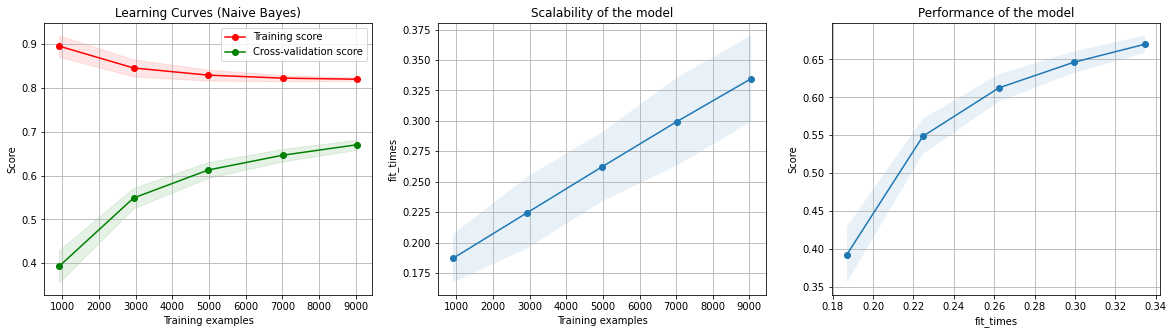

In [ ]:

# Plot the learning curve on the buit-in Multinomial NB

vec = CountVectorizer(stop_words = "english")
X = vec.fit_transform(x_train)
y = y_train

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MultinomialNB()
plot_learning_curve(
    estimator, title, X, y, ylim = None, cv= cv, n_jobs = 4)

plt.show()


It can be seen that there is a noticeable gap between the training score and the cross-validaion score, this insight means that the performance of the model better on the training set than on the test set. It might indicate that the model tends to be over-fitting. 

In [ ]:
!pip install english_words


### Bonus I (5 points)
#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

### Bonus II (5 points)
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

In order to correct analyzed error in models we can use model interpretation, there are few ways to do that-
1. Features - checking if the model features model are good might help to get better results for the model. Sometimes models errors might be caused by "poor" features. Checking the contribution of each feature of the model to our model (for example by calculating postpriors) and removing the "bad" features can help us to achieve better results for the model. Sometimes selection of the data attributes that best characterize a predicted variable is helpful.
2. Select the right model - Sometimes the chosen models are not working in an efficient way with the given data, if we choose different models that is better for the given data we can achieve better results. 
3.  The data - sometimes it is useful to collect more data if it's possible, complete missing values in the dataset (for example null values), another way is to delete outlier values (since they might affect the learning but not necessarily represent the data well).
